# 異常値検知/変化検知まとめ

1. 異常検知における手法の種類

2. 異常検知における手法をどのシーンで使用するか

3. 異常検知における機械学習をどのように応用するか

# 目次

## 1. 異常検知の基本

- 異常検知と変化検知の基本的な考え方
- 確率分布の推定精度を測る指標
- ホテリング法による異常検知
- ユークリッド距離とマハラノビス距離の違い
- ホテリング理論の問題点
- 単純ベイズ法による異常検知

## 2. シーンに応じた異常検知の手法

- 近傍法による異常検知
- 混合分布モデルによつ逐次更新型異常検知
- サポートべクトルデータ記述法による異常検知
- 方向データの異常検知
- ガウス過程回帰による異常検知
- 部分空間法による異常検知
- 疎構造学習による異常検知

## 手法の全体像

<img src="14_outlier/img100.jpg" width="450px" height="450px">

# 1. 異常検知の基本

## 1-1. 異常検知と変化検知の基本的な考え方

異常検知は異常な値を観測した瞬間に異常を検知して欲しいもの

→ そのためには正常なデータが何かを把握する必要があります。

→ では正常なデータはどのように判断すれば良いでしょう。

ここで使う考え方が確率分布。<br>
確率分布を把握すると**すべてのデータを把握しなくても正常なデータが取りうるだろう値を予測できる**点が良い点。

確率分布の良さはデータをもっとも良く表す確率分布を推定することが出来れば、
データの推定は容易になります。

全てのデータに対して推定する必要がなく、**確率分布の推定さえできれば良い**ということが利点。



## 1-2. 確率分布の推定精度を測る指標

### 1-2-1. 正常標本精度,異常標本精度,F値

**正常標本精度**：正常のデータ判定精度 = (実際の正常標本中、正常と判定した数)/(実際の正常標本数)<br>
accuracy、正答率

**異常標本精度**：異常なデータ判定精度 = (実際の異常標本中、異常と判定した数)/(実際の異常標本数)<br>
recall、再現率、ヒット率

上記のバランスを取った値がF値といわれる値です。

F値：正常標本精度と異常標本精度の調和平均
（ROC曲線で調査することもある）

データが正規分布に従うと仮定して、<br>
異常値が検出された場合に把握できることが分かる。


### 1-2-2. ラベル付きデータの場合

M次元のベクトル $x$ が異常かどうかのラベル　$y$ とともにN個の訓練データ $D$ が観測されているとする。

$D=[ (x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}), ...,(x^{(n)}, y^{(n)}) ]
$<br>
→ このとき新たに現れたx'が異常値かどうか判定したい

<考え方>

訓練データ $D$ より異常値と正常値の確率分布を得る。<br>
$p(x'|y=0,D)$(正常時の確率) よりも $p(x'|y=1,D)$(異常時の確率) の方が優勢であれば異常<br>
と判定する。

異常度(anomaly score)<br>
$a(x')=ln\frac{p(x'|y=1,D)}{p(x'|y=0,D)}
$
<img src="14_outlier/img101.png" width="450px" height="450px">

### 1-2-3. ネイマン・ピアソン決定則

$a(x')=ln\frac{p(x'|y=1,D)}{p(x'|y=0,D)}$ が所定の閾値を超えたら y=1

この異常度の定義はある一定の正答率においてヒット率を最大にする。

## 1-3. ホテリング法による異常検知

**利用シーン**<br>
- データが多変量正規分布に従う時（ランダムなデータなど）の異常度検出の方法。<br>
- 異常度 $a(x)$ はマハラノビス距離で与える。<br>
- この多変量正規分布を最尤推定し、（平均と分散を推定する）得られたデータとのマハラノビス距離を計算することで一定の距離以上離れたものは異常と判断する手法。<br>
- サンプル数Nが次元数Mより圧倒的に多い場合は $a(x)$ は自由度$M$、スケール因子1のカイ二乗分布に従う<br>

**理由**<br>
マハラノビス距離はデータのばらつきに左右されない距離なので、**ばらつきの多いデータの異常度を測るときに有効**。<br>
ただしマハラノビス距離はカイ2乗分布に従うため、カイ2乗分布に当てはめて問題を解く必要がある。

→カイ二乗分布で欲しい閾値(逆関数か対応表から)を決めておく<br>
→カイ二乗分布の分散は2Mであるため、精度よく異常検知をするためには
なるべく変数選択をするか部分集合毎に $T^2$ を計算するのがよい

### ホテリングサンプル1

特徴量が一つ、weight のみ。

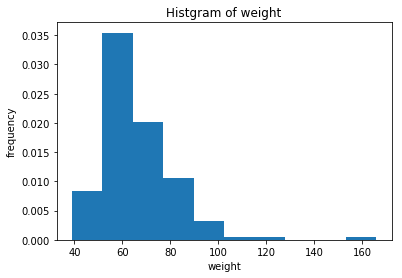

標本平均: 65.8
標本分散: 226.71999999999977
異常度: 0       0.553282
1       0.268349
2       0.722653
3       0.021348
4       0.203952
5       0.458892
6       0.458892
7       0.045166
8       0.119266
9       0.002823
10      0.077805
11     44.283874
12      0.966126
13      0.014291
14      0.839979
15      0.002823
16      3.027699
17      0.063691
18      0.458892
19      0.101623
20     12.483416
21      0.101623
22      0.002823
23      0.000176
24      0.614150
25      1.101094
26      0.034580
27      0.268349
28      3.167960
29      5.465067
         ...    
170     0.458892
171     0.614150
172     0.101623
173     1.157551
174     0.063691
175     0.119266
176     0.148377
177     0.000176
178     1.019054
179     0.021348
180     0.889379
181     2.292872
182     1.157551
183     0.034580
184     0.077805
185     0.423606
186     0.148377
187     0.268349
188     0.458892
189     1.101094
190     2.173783
191     2.374030
192     0.203952
193     0.966126
194     0.063691
195    

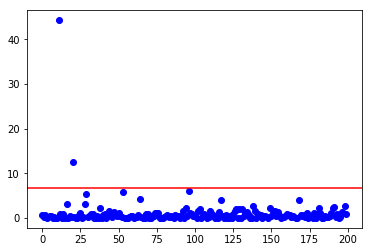

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import chi2

df = pd.read_csv("./14_outlier/Davis.csv")
# df.describe()

# 体重のヒストグラム
plt.hist(df["weight"], normed=True)
plt.title("Histgram of weight")
plt.xlabel("weight")
plt.ylabel("frequency")
plt.show()

# 2.2.4 ホテリングT2法（1次元）
mu = df["weight"].mean()
s2 = ((df["weight"] - mu)**2).mean()

print("標本平均: {0}".format(mu))   # sample mean
print("標本分散: {0}".format(s2))   # sample variance

a = (df["weight"] - mu)**2 / s2     
print("異常度: {0}".format(a))   # anomaly score

th = chi2.isf(1 - 0.99, 1)
print("カイ２乗分布による1%水準の閾値: {0}".format(a))   # threshold

# 異常度をプロット
plt.plot(range(200), a, "bo")
plt.axhline(y=th,color='red')
plt.show()

### ホテリングサンプル2

特徴量が２つ、weightとheight 。

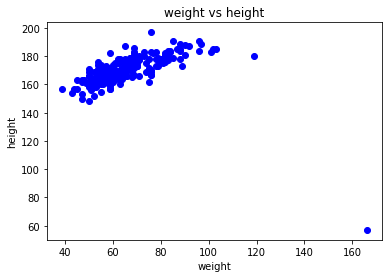

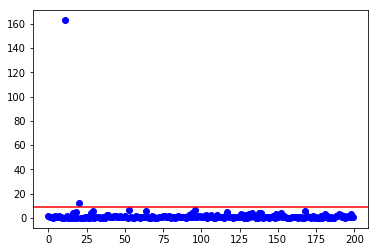

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import chi2

# 観測データを取得
df = pd.read_csv("./14_outlier/Davis.csv")
weight = df["weight"]
height = df["height"]

# 体重-身長をプロット
plt.plot(weight, height, "bo")
plt.title("weight vs height")
plt.xlabel("weight")
plt.ylabel("height")
plt.show()

X = pd.concat([weight, height], axis=1) # 標本数 * 次元数(2)のデータ行列
X = X.as_matrix() # numpyのarray型へ変換
mx = X.mean(axis=0) # 標本平均
Xc = X - mx # 中心化したデータ行列
# Sx = (1.0 / len(X)) * Xc.T.dot(Xc) # 標本共分散行列
Sx = np.cov(X, rowvar=0, bias=1) # 標本共分散行列
a = (Xc.dot(np.linalg.pinv(Sx)) * Xc).sum(axis=1)

# 閾値を設定
th = chi2.isf(1 - 0.99, 2)  # 自由度2のカイ２乗分布

# 異常度をプロット
plt.plot(range(len(a)), a, "bo")
plt.axhline(y=th,color='red')
plt.show()

## 1-4. ユークリッド距離とマハラノビス距離の違い

異常度としてのマハラノビス距離は<br>
$a(x')=(x'-\mu)^T \Sigma^{-1} (x'-\mu)$<br>
$\mu$:標本平均、$\Sigma^{-1}$：共分散行列の逆行列

<img src="14_outlier/img102.png" width="450px" height="450px">

ユークリッド距離とマハラノビス距離の違いは，距離を定義する際に，**多次元のデータの相関を考慮しているか**という点にある．<br>
→マハラノビス距離において，**相関が強い距離の方向とは，実際の距離よりも相対的に短くなる**．

ユークリッド距離の場合，距離はx軸，y軸ともに等しい距離になります．<br>
しかしマハラノビス距離は，x軸，y軸ともに分散で形が定まっています．

つまり，分散が大きいと，原点からの距離はあまり離れていないと解釈することができますし，<br>
分散が小さいと，原点からの距離は大きく離れているということになります．

<img src="14_outlier/img103.png" width="450px" height="450px">

この図は，原点から楕円が複数にわたって描かれています．

この楕円の大きさが，異常値の閾値の大きさを示しています．<br>
→**閾値が大きいと楕円が大きく，異常値の割合は少なくなります**．

楕円の形は分散によって決まる<br>
→山の等高線のようなイメージで解釈すると理解しやすい

等高線は，同じ高さにある山の部分をくくっている<br>
→マハラノビス距離も同じです．

軸という概念を考えずに，同じ楕円で囲まれた範囲のものが閾値の値になっている<br>
という解釈をすれば，円の歪み方にも納得がいく

### マハラノビス距離はカイ二乗分布に従うという点

$a(x')=(x'-\mu)^T \Sigma^{-1} (x'-\mu)$<br>                       
→標準化したM個のベクトルの要素の和の2乗となっている。

ここで、標準正規分布の二乗が、カイ二乗分布（自由度１）に従っていたことから、<br>
マハラノビス距離の2乗は、多次元正規分布に従うと仮定できる時、<br>
カイ二乗分布（自由度M）に従うと言える。

## 1-5. ホテリング理論の問題点
ホテリング理論は異常値を検出する最も基礎的な方法ですが以下の問題点があります。

1．データが単一の正規分布から発生していると仮定しているため、正規分布から著しく外れている場合、<br>
分布が複数の山を持つ場合などは異常値を正しく判断できなくなる

2．正規分布のパラメータは変化しないとしているために、分布のパラメータが変化するような時系列データ<br>
には適用することができない

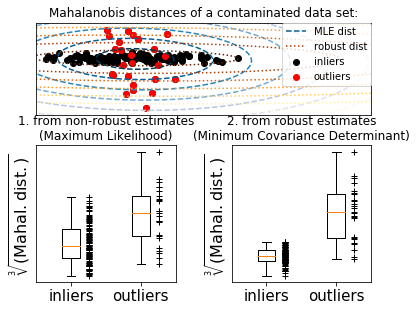

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.covariance import EmpiricalCovariance, MinCovDet

n_samples = 125
n_outliers = 25
n_features = 2

# generate data
gen_cov = np.eye(n_features)
gen_cov[0, 0] = 2.
X = np.dot(np.random.randn(n_samples, n_features), gen_cov)
# add some outliers
outliers_cov = np.eye(n_features)
outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.
X[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)

# fit a Minimum Covariance Determinant (MCD) robust estimator to data
robust_cov = MinCovDet().fit(X)

# compare estimators learnt from the full data set with true parameters
emp_cov = EmpiricalCovariance().fit(X)

# #############################################################################
# Display results
fig = plt.figure()
plt.subplots_adjust(hspace=-.1, wspace=.4, top=.95, bottom=.05)

# Show data set
subfig1 = plt.subplot(3, 1, 1)
inlier_plot = subfig1.scatter(X[:, 0], X[:, 1],
                              color='black', label='inliers')
outlier_plot = subfig1.scatter(X[:, 0][-n_outliers:], X[:, 1][-n_outliers:],
                               color='red', label='outliers')
subfig1.set_xlim(subfig1.get_xlim()[0], 11.)
subfig1.set_title("Mahalanobis distances of a contaminated data set:")

# Show contours of the distance functions
xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
zz = np.c_[xx.ravel(), yy.ravel()]

mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = subfig1.contour(xx, yy, np.sqrt(mahal_emp_cov),
                                  cmap=plt.cm.PuBu_r,
                                  linestyles='dashed')

mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = subfig1.contour(xx, yy, np.sqrt(mahal_robust_cov),
                                 cmap=plt.cm.YlOrBr_r, linestyles='dotted')

subfig1.legend([emp_cov_contour.collections[1], robust_contour.collections[1],
                inlier_plot, outlier_plot],
               ['MLE dist', 'robust dist', 'inliers', 'outliers'],
               loc="upper right", borderaxespad=0)
plt.xticks(())
plt.yticks(())

# Plot the scores for each point
emp_mahal = emp_cov.mahalanobis(X - np.mean(X, 0)) ** (0.33)
subfig2 = plt.subplot(2, 2, 3)
subfig2.boxplot([emp_mahal[:-n_outliers], emp_mahal[-n_outliers:]], widths=.25)
subfig2.plot(1.26 * np.ones(n_samples - n_outliers),
             emp_mahal[:-n_outliers], '+k', markeredgewidth=1)
subfig2.plot(2.26 * np.ones(n_outliers),
             emp_mahal[-n_outliers:], '+k', markeredgewidth=1)
subfig2.axes.set_xticklabels(('inliers', 'outliers'), size=15)
subfig2.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
subfig2.set_title("1. from non-robust estimates\n(Maximum Likelihood)")
plt.yticks(())

robust_mahal = robust_cov.mahalanobis(X - robust_cov.location_) ** (0.33)
subfig3 = plt.subplot(2, 2, 4)
subfig3.boxplot([robust_mahal[:-n_outliers], robust_mahal[-n_outliers:]],
                widths=.25)
subfig3.plot(1.26 * np.ones(n_samples - n_outliers),
             robust_mahal[:-n_outliers], '+k', markeredgewidth=1)
subfig3.plot(2.26 * np.ones(n_outliers),
             robust_mahal[-n_outliers:], '+k', markeredgewidth=1)
subfig3.axes.set_xticklabels(('inliers', 'outliers'), size=15)
subfig3.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
subfig3.set_title("2. from robust estimates\n(Minimum Covariance Determinant)")
plt.yticks(())

plt.show()

### マハラノビス=タグチ法

Index(['Alaska', 'Calif', 'Dela', 'DC', 'Maine', 'Mont'], dtype='object')
[ 3.5819906   4.5590257   1.00239092  4.34566837  3.57297596  2.28755737]


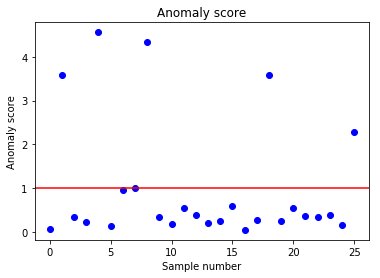

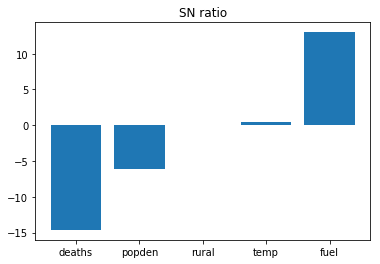

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import chi2

# 観測データを取得
df = pd.read_csv("./14_outlier/road.csv", index_col=0)   # インデックス列は除いて読み込む

# Numpyのarray型へ変換
X = df.drop("drivers", axis=1).as_matrix()  # drivers列を除く
drivers = df.as_matrix(columns=["drivers"])

# マハラノビス=タグチ法
X = X / drivers     # 1ドライバー当たりの数値に変換
X = np.log(X + 1)   # 対数変換（ボックス=コックス変換）
mx = X.mean(axis=0) # 標本平均
Xc = X - mx         # 中心化したデータ行列
# Sx = (1.0 / len(X)) * Xc.T.dot(Xc) # 標本共分散行列
Sx = np.cov(X, rowvar=0, bias=1) # 標本共分散行列
a = (Xc.dot(np.linalg.pinv(Sx)) * Xc).sum(axis=1) / X.shape[1]  # 1変数当たりの異常度

# 閾値を決定
# （標本が正常範囲に入るように1変数当たりのマハラノビス距離の閾値を決める）
th = 1.0

state_label = df.index[a>th]    # 閾値を超えた州の名前リスト
state_a = a[a>th]               # 閾値を超えた州の異常度リスト
print(state_label)
print(state_a)

# プロット
plt.plot(range(len(a)), a, "bo")
plt.axhline(y=th,color='red')
plt.title("Anomaly score")
plt.xlabel("Sample number")
plt.ylabel("Anomaly score")
plt.show()

# SN比解析
xc_prime = Xc[4,:]  # 中心化行列からCalifのデータ行を取得
SN1 = 10 * np.log10(xc_prime**2 / np.diag(Sx))

plt.bar(range(len(SN1)), SN1, tick_label=["deaths","popden","rural","temp","fuel"], align="center")
plt.title("SN ratio")
plt.show()

## 1-6. 単純ベイズ法による異常検知

### 1-6-1. 利用シーン

変数が多い場合に変数切り分けて問題を解く手法がナイーブベイズです。

例えば迷惑メールフィルタの場合<br>
迷惑メールになる要素が

1. リンクが多い
2. 文章が異常に長い
3. 画像が貼ってある
4. 文章に適切でない単語が含まれる。（単語の数文だけ0と1で表される次元）
：

**理由**<br>
次元数が多い場合に**各次元が独立だと仮定**し、ベイズの決定則を使用すれば<br>
1次元の問題に変換して最尤推定が可能になる。

独立と仮定すると共分散の非対角成分が0とおいたものを扱えるので<br>
単純な平均と分散を計算する問題にラベルなしデータでも扱える。



### 1-6-2. 多項分布

**利用シーン**<br>
想定する分布が正規分布ではない場合

- 各商品の閲覧回数
- 各ジャンルの本の貸出回数

頻度専用の分布として多項分布で問題を解く場合も同様に独立として考えることができます。<br>
ただし一度も表れないケースも考慮に入れる必要があるためスムージングと呼ばれる処理が行われています。

多項分布を推定するときに事前知識を考慮する事前分布のパラメータを使用する。<br>
この時の事前分布はディリクレ分布でベイズの定理を用いて事後確率を推定する。

### 1-6-3. ベイズ決定則とネイマン・ピアソン決定則の関係

### ベイズ決定則

もし $ln \frac{p(y=1|x)}{p(y=0|x)} > 0$ ならば、$y = 1$ と判定

ベイズの定理 $p(x|y)p(y) \propto p(y|x)$ より

・ネイマン・ピアソン決定則 では、$p(x|y=1)$ と $p(x|y=0)$ の比がある閾値を超えていたら異常と判定

・ベイズ決定則　では、$p(x|y=1)p(y=1)$ と $p(x|y=0)p(y=0)$ の比が1を超えていたら異常と判定

異常検知問題では、ほとんど常に $p(y=1) \ll p(y=0)$ 十分小さいので、ベイズ決定則では<br>
**異常判定を強く抑制する**傾向にある。<br>
→あまり深く考えずに異常検知に使うと異常標本精度が非常に低くなってしまうため注意が必要

この問題を避けるには、ベイズ決定則　における固定した閾値を、調整パラメータと考えれば良い。

### 1-6-4. ディリクレ分布のおさらい

ディリクレ分布はベータ分布を多変量に拡張したような分布です。
<img src="14_outlier/img106.png" width="350px" height="350px">

実際，ディリクレ分布において $n=2$ の場合を考えると， $x_1+x_2=1$ より，<br>
$
f(x_1)=Cx_1^{\alpha_1-1}(1-x_1)^{\alpha_2-1}\:(0\leq x_1\leq 1)
$ 

となり，ベータ分布になります。

ディリクレ分布から抽出したサンプル<br>
 $(x_1,\cdots,x_{n-1},x_n=1-x_1-\dots -x_{n-1})$  について，<br>
 $x_1+\cdots +x_n=1,x_i\geq 0\:(1\leq i\leq n)$

が成立するので（確率 $x_i$ で事象 $A_i$ が起こるとみなすことで）多項分布と対応します。

つまり，ディリクレ分布は確率分布（多項分布）の分布とみなすことができます。<br>
ベイズ推定の文脈でディリクレ分布は多項分布の共役事前分布です。

$
Dir(\theta|\alpha)=
\dfrac{\Gamma(\alpha_1)\cdots \Gamma(\alpha_n)}{\Gamma(\alpha_1+\cdots +\alpha_n)}
\theta_1^{\alpha_1 -1}...\theta_M^{\alpha_M -1}
$

### 1-6−5. 最大事後確率推定と多項分布のスムージング

事後確率を最大化するような θ の推定を**最大事後確率 (maximum a posteriori) 推定**とよぶ。

$\displaystyle
\begin{eqnarray} 
\theta^{MAP} &=& argmax_{\theta} p(\theta|n)
\\
&=&
argmax_{\theta} p(n|\theta)p(\theta)
\end{eqnarray}
$

Dirichlet-多項分布の場合は以下のようになる。<br>
$
\theta^{MAP} = argmax_{\theta} Dir(\theta|n + \alpha)
$

$
\theta_k^{MAP} = \frac{n_k + \alpha_k − 1}{\Sigma_{k=1}^{K} (n_k + \alpha_k − 1)}
=\frac{n_k + \alpha_k − 1}{N+ A − K}
$

最尤推定 $\theta_k^{ML} = \frac{n_k}{N}$  と比較すると、<br>
**加算スムージング** が行われていることが確認できる。

### TODO スムージングの補足

# 2. シーンに応じた異常検知の手法

## 2-1. 近傍法による異常検知
- k近傍法
- マージン最大化近傍法

### 2-1-1. k近傍法

**利用シーン**<br>
ホテリングの手法が有効なのはデータが一定値の周りに集中しているような状況のみ。<br>
そのような制約がない手法として、近傍法があります。

下図のように近傍を取る点を与えてその半径εが大きい点を取るようなデータは異常度を疑う手法。
<img src="14_outlier/img104.jpg" width="250px" height="250px">

**手法**<br>
- ユークリッド距離を使用<br>
kの初期値に依存するため、半径εの設定はユークリッド距離で設定されています。<br>
- 局所はずれ値度を使用<br>
距離が適切でない場合は**局所はずれ値度** という手法が用いられます。

#### 補足

- いわゆるkNNによる方法
- 目的関数には以下の2つの観点が盛り込まれている<br>
  同一ラベルの標本はなるべく密集するように<br>
  異なるラベルの標本はなる<br>
  
- 書きくだすと半正定値計画(SDP, semi-deﬁnite programing) <br>
  劣勾配法と固有値分解を繰り返していく<br>


### k近傍法の実装サンプル

In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, metrics

iris = datasets.load_iris() # 4次元、150サンプルのデータセットで
                            # 植物の萼（がく）の長さ、幅、 花びらの長さ、幅、単位はcm。
iris_X = iris.data[:, :2]  # 4次元のうち、最初の2次元の特徴量だけを使用
iris_y = iris.target # 正解ラベル, 0, 1, 2の3種類

In [6]:
# 教師データとテストデータに分割

np.random.seed(0) # 乱数のシード設定、0じゃなくてもなんでもいい
indices = np.random.permutation(len(iris_X)) # 0~149の数字をランダムに並び替え
# 140個のデータセットを105個の教師データと35個のテストデータに分ける
iris_X_train = iris_X[indices[:-35]]
iris_y_train = iris_y[indices[:-35]]
iris_X_test = iris_X[indices[-35:]]
iris_y_test = iris_y[indices[-35:]]

In [7]:
# カラーマップの作成
# 正解ラベルの個数に応じて3色作成。2つあるのは、教師データ用(cmap_bold)と学習結果用(cmap_light)。

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [8]:
# 変数の設定
# 今回使用する識別器はKNeighborsClassifier。変数のkが最も重要で、
# サンプルデータに最も近いｋ個のデータがどのラベルに属するかを調べ、
# その多数決でサンプルデータのラベルを分類する。デフォルトは5。
# 今回取り上げるもうひとつの変数である"weights"には、"uniform"と"distance"の2つが用意されている。

# uniform：データ間の距離によらず一様な重みを与える。デフォルトはこれ。
# distance：距離が近いデータほどその影響が大きくなるよう、距離に反比例して重みが与えられる。
# 他にも algorithm などの変数がある。
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html#sklearn.neighbors.RadiusNeighborsClassifier

h = 0.1 # メッシュサイズ
k_list = [1, 5, 10, 30] # k の数
weights_list =['uniform', 'distance']
score = np.zeros((len(k_list)*2,5)) # score

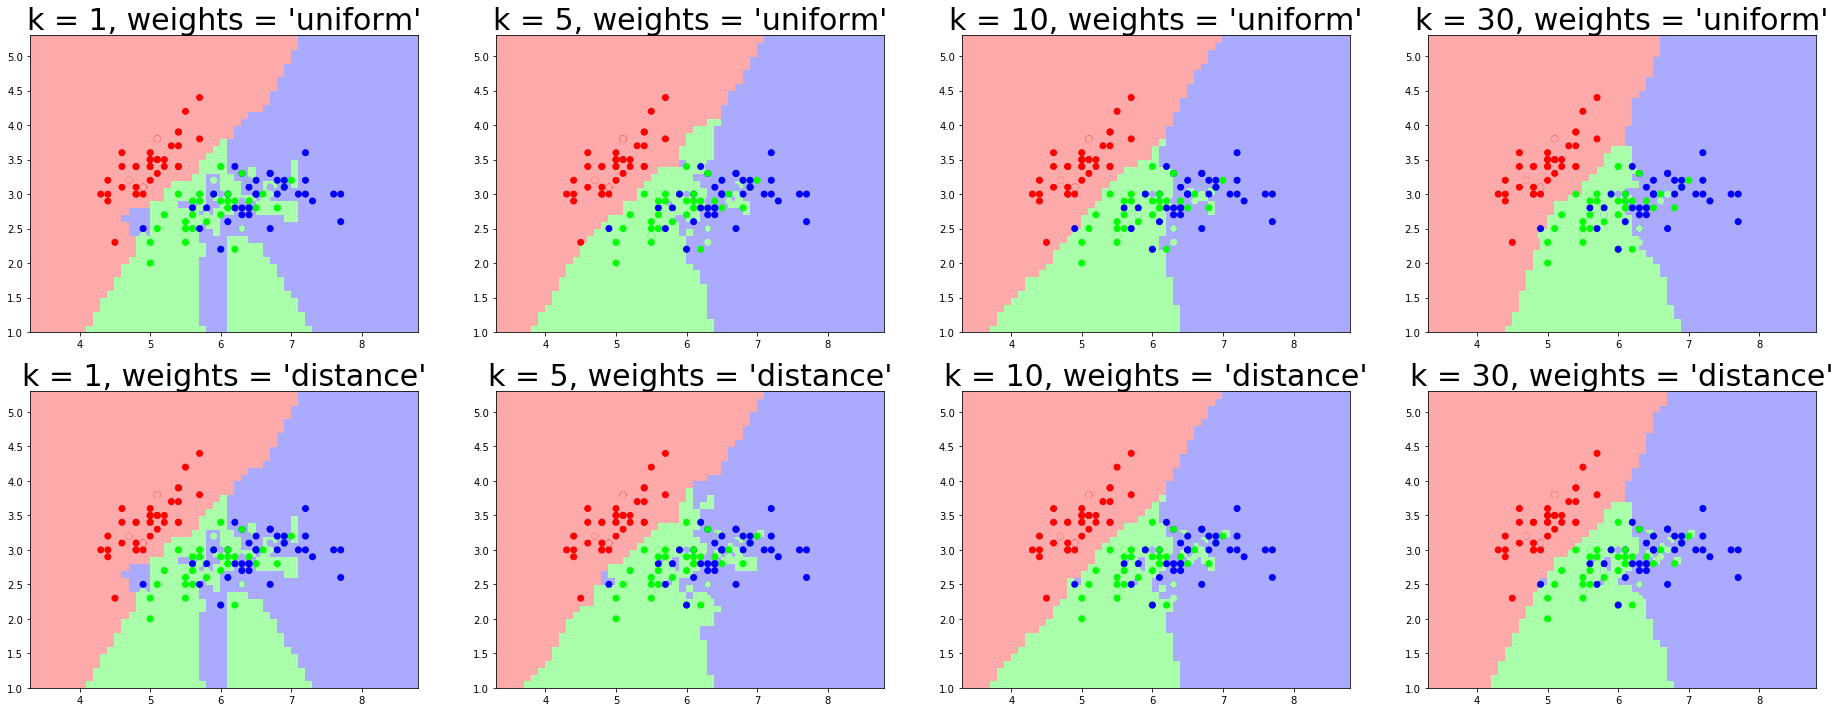

In [9]:
# 学習と結果の可視化
# 入力が2次元データなので、カラーマップで分類境界を表示してみる。

plt.figure(figsize=(8*len(k_list), 12))
i = 1 # subplot用
for weights in weights_list:
    for k in k_list:
        clf = neighbors.KNeighborsClassifier(k, weights=weights)
        clf.fit(iris_X_train, iris_y_train)
        
        x1_min, x1_max = iris_X[:, 0].min() - 1, iris_X[:, 0].max() + 1 # Xの1次元目の最小と最大を取得
        x2_min, x2_max = iris_X[:, 1].min() - 1, iris_X[:, 1].max() + 1 # Xの2次元目の最小と最大を取得
        
        # x1_min から x1_max まで、x2_min から x2_max までの h 刻みの等間隔な格子状配列を生成
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
        # メッシュ状の各点に対して予測 / .ravel()で一次元配列に変換し、np.c_[]でxx1, xx2をxx2ごとに合体
        Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
        Z = Z.reshape(xx1.shape) # 配列形式変更
        
        val_precision = metrics.precision_score(iris_y_test, clf.predict(iris_X_test), average='weighted')
        val_recall =       metrics.recall_score(iris_y_test,clf.predict(iris_X_test),average='weighted')
        val_f1 =            metrics.f1_score(iris_y_test, clf.predict(iris_X_test),average='weighted')
        score[i-1,3] = k
        score[i-1,0] = val_f1
        score[i-1,1] = val_precision
        score[i-1,2] = val_recall
        
        plt.subplot(2,len(k_list),i) # 2行 × k_list列のグラフのi番目のグラフに
        plt.pcolormesh(xx1, xx2, Z, cmap=cmap_light) # 学習結果をプロット
        plt.scatter(iris_X_train[:, 0], iris_X_train[:, 1], c=iris_y_train, cmap=cmap_bold) # 教師データをプロット
        plt.scatter(iris_X_test[:, 0], iris_X_test[:, 1], c=iris_y_test, cmap=cmap_light) # テストデータをプロット
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        plt.title("k = %i, weights = '%s'" % (k, weights), fontsize=30)
        
        #print("k = %i, weights='%s' f1 = %2f, precision=%2f recall=%2f " % (k, weights, val_f1, val_precision,val_recall))
        i = i + 1
plt.show()

### k の数による precision,recall,F1の変動

<function matplotlib.pyplot.show>

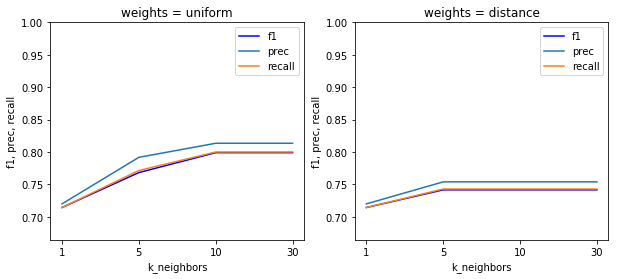

In [10]:
plt.figure(figsize=(10, 4))
i = 0
for weights in weights_list:
    plt.subplot(1,2,i+1)
    plt.plot(score[i*len(k_list):(i+1)*len(k_list),0], color="blue")
    plt.plot(score[i*len(k_list):(i+1)*len(k_list),1])
    plt.plot(score[i*len(k_list):(i+1)*len(k_list),2])
    plt.xticks([0,1,2,3],k_list)
    plt.ylim(score[:,:3].min()-0.05, 1.00)
    plt.title("weights = %s" % weights)
    plt.legend(('f1', 'prec', 'recall'), loc='upper right')
    plt.xlabel("k_neighbors")
    plt.ylabel("f1, prec, recall")
    i = i + 1
plt.show

### 2-1-2. マージン最大化近傍法

**利用シーン**<br>
ユークリッド距離の変わりに行列Aを半正定値行列と見立てて、データから学習することでより性能が向上できます。<br>
分類したいグループとそうでないグループのマージンを最大化する手法をとると<br>
もっとも識別能力が上がるのでこの手法が使用されます。

**手法**<br>
- 最適化の手法には劣勾配と固有値計算が組み合わされて使用されます。
- 劣勾配とは通常の微分では計算できないような角の部分だけ正の項を入力して後は外す手法です。
- 固有値計算は変換する行列を固有値分解して負の固有値を0で置き換えることです。
- 確率モデルでも、データの近傍にしかデータが発生しないという定理の元に成り立ちます。

### 実装サンプル
→TODO

## 2-2. 混合分布モデルによる逐次更新型異常検知

**利用シーン**<br>
実データはいろんな状態を含んだモデルが多く存在します。

例:発汗量と消費カロリーの関係性では運動時と平常時では観測される値が異なることが直感的にわかる。<br>
混合分布モデルによる逐次更新型異常検知は直感を**異なる複数のモードを持つ系の列**にしたもの。

<img src="14_outlier/img105.jpg" width="250px" height="250px">


**手法**<br>
- EM法を用いて最適化（解析的に求まらないため）<br>
 http://www.slideshare.net/takao-y/20131113-em

- 最適化の手法には逐次更新とバッチ更新があります<br>
（逐次更新の場合は忘却率を用意して、過去の値を引きづりすぎないようにします）



### 混合正規分布(ガウス混合分布)モデルによるクラスタリングの実装サンプル

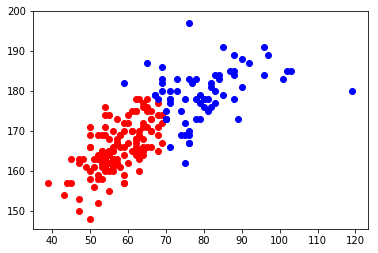

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture

# 観測データを取得
df = pd.read_csv("./14_outlier/Davis.csv")
weight = df["weight"]
height = df["height"]

X = pd.concat([weight, height], axis=1) # 標本数 * 次元数(2)のデータ行列
X_train = X.drop(11)  # 11番目のデータを除去
X = X.as_matrix()
X_train = X_train.as_matrix()

# 混合正規分布(ガウス混合分布)モデルによるクラスタリング
clf = GaussianMixture(n_components=2)
clf.fit(X_train)
X_pred = clf.predict(X_train)

# クラスタリングの結果をプロット
cluster0 = X_train[X_pred == 0]
cluster1 = X_train[X_pred == 1]
plt.scatter(cluster0[:,0], cluster0[:,1], color="red")
plt.scatter(cluster1[:,0], cluster1[:,1], color="blue")
plt.show()

In [12]:
# 混合比を取り出す
pi = clf.weights_
print("混合比:",pi)

混合比: [ 0.61652157  0.38347843]


In [13]:
# 異常度を計算
#anomaly_scores = -clf.score_samples(X)[0]
anomaly_scores = -clf.score_samples(X)
print("異常度:",anomaly_scores)

異常度: [   7.25105974    6.37191715    6.13684427    6.711525      7.84874018
    7.80947538    8.5799518     8.70271375    6.86835904    6.17102645
    6.67127995  334.04793836    6.30582617    6.18957414    6.16708658
    6.67700623    8.10355275    5.94060996   12.2797777     6.6790682
   14.55605236    5.91524256    6.43816629    6.29559353    6.98737125
    6.9217547     6.00201599    5.79166219    9.67632837    9.05196439
    8.17222888    6.96701269    7.47929164    6.21082312    6.80833019
    6.63075714    5.8528438     6.5781908     7.59828713    9.74674361
    5.95806796    7.09052235    6.8886965     7.3574649     7.29408363
    6.24209508    7.07743639    6.62571       7.90455132   10.27739167
    7.23567644    5.83352249    7.83701337    9.16178218    6.83534186
    6.5887839     6.33511954    7.53538049    7.35714419    6.82542257
    7.72863997    6.79780676    7.09947512    7.41526067    8.76076563
    6.47203688    6.65073311    6.88485226    6.56677969    7.09052235
  

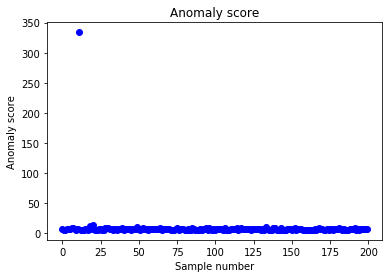

In [14]:
# 異常度をプロット
plt.title("Anomaly score")
plt.xlabel("Sample number")
plt.ylabel("Anomaly score")
plt.plot(range(len(anomaly_scores)), anomaly_scores, "bo")
plt.show()

## 2-3. サポートべクトルデータ記述法による異常検知

**利用シーン**<br>
異常と正常を分けているベクトルは少数でそれはサポートベクトルと呼ばれる。<br>
カーネルトリックを用いて、複雑な最適化問題を簡単な問題にしたい場合に使用する。

**手法**<br>
- 双対問題で問題を解きやすい形に置き換えて、カーネルトリックにより別の次元で単純な分類できる<br>
  問題に置き換えて、サポートベクトルと呼ばれる識別面のみをよく表すベクトルで異常度を検知する手法。

注意点として、カーネルトリックによる別空間への写像は特殊なテクニックでパラメータに依存するので<br>
確認してから使用が必要です。

### OneClassSVM による異常検知サンプル

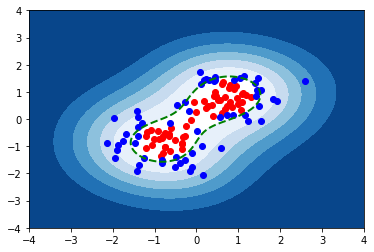

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import svm
from scipy import stats

# サンプルデータを作成
X1 = np.random.normal(0.0, 1.0, (60,2)) # 平均0.0、分散1.0の正規分布に乱数を60*2行列で作成
X2 = np.random.normal(3.0, 1.0, (60,2)) # 平均3.0、分散1.0の正規分布に乱数を60*2行列で作成
X = np.vstack([X1, X2]) # X1とX2を連結

# 標準化（平均0、分散1となるように変換）
X_train = preprocessing.scale(X)

# SVM
clf = svm.OneClassSVM(nu=0.5, kernel="rbf", gamma=0.5)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)

# 閾値を設定
th = stats.scoreatpercentile(y_pred_train, 100 * 0.05) # パーセンタイルで異常判定の閾値設定
        
# ２次元作図用格子状データの生成
xx, yy = np.meshgrid(np.linspace(-4, 4, 500), np.linspace(-4, 4, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) # 格子状に超平面との距離を出力
Z = Z.reshape(xx.shape)

# プロット
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), th, 7), cmap=plt.cm.Blues_r)
plt.contour(xx, yy, Z, levels=[th], linewidths=2, colors='green')
plt.scatter(X_train[y_pred_train==1][:,0], X_train[y_pred_train==1][:,1], color="red")
plt.scatter(X_train[y_pred_train==-1][:,0], X_train[y_pred_train==-1][:,1], color="blue")
plt.show()

## 2-4. 方向データの異常検知

### 2-4-1. 利用シーン

長さが揃っているデータで方向が異なるもの扱う分布を使用します。<br>
（大量の文書における各文書の単語の頻度ベクトルを規格化した場合など）

**手法**<br>
- フォン ミーゼス・フィッシャー分布（平均方向と集中度のパラメータを持つ）<br>
- 方向データに対して有効な分布<br>
- 異常度のカイ2乗分布により異常と検知する。

### 2-4-2. フォン ミーゼス・フィッシャー分布

確率密度関数が<br>
$f(x)=Ce^{\kappa\mu^{\top} x}$<br>
であるような確率分布をフォン ミーゼス・フィッシャー分布（Von Mises–Fisher distribution）と言う。<br>
以下、vMFDと記述する。

ガウス分布は、平均と分散で記述される。<br>
それに対して、vMFDは**単位円周上の確率**を表す**「平均方向」**と**「集中度」**で記述される。<br>
平均方向は平均、集中度は分散に対応するようなパラメータである。(ただし、集中度は大きいほど、ばらつきが小さくなる)<br>
→$d$  次元空間内の「向き」に定義された確率分布とみなすことができる。

- 入力 $x$ は $d$ 次元ベクトルで，定義域は$ |x|=1$ を満たすもの全体（球面上）
- パラメータ $μ$ は 分布している点の平均方向 （長さが 1 の $d$ 次元ベクトル）
- パラメータ $\kappa$ は μ 周りの集中度（0 以上の定数）
です。

$C$ は正規化定数です。<br>

<img src="14_outlier/img108.png" width="250px" height="250px">

$\kappa$(集中度)と分散の関係($\theta$ は平均方向からの角度)<br>
集中度が大きくなると平均方向μ(実線)から離れた位置まで点が存在するというイメージ
<img src="14_outlier/img109.png" width="450px" height="450px">

d=2  の場合でvMFDの意味を見てみます。定義域は単位円周上です。
<img src="14_outlier/img107.png" width="250px" height="250px">

- 単位円周上の点と向きの対応
- 単位円周上の点には「向き」が対応します。
（例えば赤い点には「右上」が対応する）

つまり，vMFDでは**平面上の「向き」に対して確率が定義されている**と考えることができます。

また，$\mu^{T}x$ は $\mu$ と $x$ がなす角のコサインなので，向きが似ていれば値が大きくなります。<br>
つまり，$\mu$ という向きに近い向きのときほど確率が高いような分布となっています。$\mu$ は「向きの平均」です。<br>
そして，$\kappa$ が大きいほど分布が $\mu$ 付近に集中していることが分かります。

### 実装サンプル

text miningや方向情報の特徴抽出に便利な，超球上に分布する点をクラスタリングする方法<br>
https://qiita.com/TomHortons/items/5819f14ba65e732b5bc6

## 2-5. ガウス過程回帰による異常検知

**利用シーン**<br>
入力と出力を観測して応答異常検知が可能なためシーンで使用します。

**手法**<br>
観測モデルと滑らかさを制御するモデルの２つで構成されます。

**観測モデル**<br>
- 正規分布を考慮して、ノイズを含んだ予測を行います。
- 滑らかさを制御するモデル
- 正規分布で分散がデータの類似度を表します。

**予測までのステップ**<br>

1. データの分布を求めます
2. データの分布と事前分布から事後分布を求めます
3. 予測分布を求めます

予測分布はリッジ回帰にカーネルトリックを適用したものです

### 2-5-2. ガウス過程

線形回帰では、パラメータ $w$ はよくガウス分布に従っていました。<br>
なので、$y={\bf w}^{\rm T}\phi(x)$ も１次元のガウス分布に従い、${\bf y}={\bf\Phi}{\bf w}$ は多次元のガウス分布に従います。<br>
ただし、${\bf\Phi}$ は $\{x_1,\dots,x_N\}$ の計画行列。

このような場合、$p({\bf y})$ は**ガウス過程に従う**といいます。<br>
ガウス過程は、一次元(yがスカラー)、多次元(yが有限個のベクトル)、などに限らず<br>
**無限次元(yが無限個のベクトル)でもガウス分布に従う、いわば無限次元のガウス分布と解釈できる。**<br>

${\bf y}$ の同時分布は平均が${\bf 0}$、共分散にグラム行列 ${\bf K}$ としたガウス分布

$
{p({\bf y}) = \mathcal{N}({\bf y}|{\bf 0},K)
}
$

となる。ただし、グラム行列の要素は $k(x,x′)$ をカーネル関数として、<br>
$K_{nm}=k(x_n,x_m)$

となります。カーネル関数としては、$a,b$ を定数としてガウス関数 $k(x,x')=a\exp\left(-b(x - x')^2\right)$
などがよく使われています。

お互いに似ている $x_n,x_m$ に対しては、$y(x_n),y(x_m)$ の相関が高くなるように定められます。

この「似ている」はカーネル関数としてどのようなものを用いるのかに依ります。



### 2-5-3. ガウス過程による回帰

観測されるターゲットを $t_n=y_n + \epsilon_n$ とします。<br>
ここで $y_n={\bf w}^{\rm T}\phi(x_n)$、ノイズ $\epsilon_n$ はn番目の観測値に加わるガウス分布に従うノイズとします。<br>
精度パラメータ $\beta$ を用いると

$
{p(t_n|y_n) = \mathcal{N}(t_n|y_n,\beta^{(-1)})
}$

となります。よって、${\bf t}=(t_1,\dots,t_N)^{\rm T}$ として、

$
{p({\bf t}|{\bf y}) = \mathcal{N}({\bf t}|{\bf y},\beta^{(-1)}{\bf I}_N)
}
$

となります。ここで $y$ の同時確率はすでに上で定義したので、$t$ の同時分布が求まります。
$
{\begin{align}
p({\bf t}) &= \int p({\bf t}|{\bf y})p({\bf y})d{\bf y}\\
&= \int \mathcal{N}({\bf t}|{\bf y},\beta^{(-1)}{\bf I}_N)\mathcal{N}({\bf y}|{\bf 0},K)d{\bf y}\\
&= \mathcal{N}({\bf t}|{\bf 0},{\bf C}_N)
\end{align}
}
$

ただし、${\bf C}_N = K + \beta^{(-1)}{\bf I}_N$ としています。

N個の観測値 $t$ に加えて新たに予測したい $t_{N+1}$ として、${\bf t},t_{N+1}$ の同時確率は、
上の議論より
$
{p({\bf t},t_{N+1}) = \mathcal{N}({\bf t},t_{N+1}|{\bf 0}, {\bf C}_{N+1})
}
$

ただし、共分散行列は、
$
{\bf k} = \left(k(x_1,x_{N+1}),\dots,k(x_N,x_{N+1})\right),c=k(x_{N+1},x_{N+1})
$
として

$
{{\bf C}_{N+1} =
\begin{bmatrix}
{\bf C}_N & {\bf k}\\
{\bf k}^{\rm T} & c
\end{bmatrix}
}
$
となります。

$t,t_{N+1}$ の同時分布が分かったので、条件付き分布
$p(t_{N+1}|{\bf t})$が求まります。

$
{p(t_{N+1}|{\bf t}) = \mathcal{N}(t_{N+1}|{\bf k}^{\rm T}{\bf C}_N^{-1}{\bf t},c-{\bf k}^{\rm T}{\bf C}_N^{-1}{\bf k})
}
$


## 2-6. 部分空間法による異常検知

**利用シーン**<br>
変化が起こるが正常時のモデルと異常時のモデルが明らかに異なる場合のケースです。

**手法**<br>
- 正常状態の正規分布と異常状態の正規分布の比率で異常を検知します。
- 局所的な値で異常を検知せずに累積統計量を用いて、境界の値を超えているかどうかを検知します。
- 集約窓を使用して統計量を算出し、異常がないかどうかを検出します。

## 2-7. 特異スペクトル変換

### 2-7-1. 利用シーン

フォンゼス・フィッシャー分布を使用することで方向データを扱えるので、<br>
ノイズに強くなる利点があるため、部分空間でも特にノイズが多い場合に使用します。

**手法**<br>
- 部分空間同士の距離を評価<br>
フォンゼス・フィッシャー分布を使用して、部分空間同士の距離を評価することで変化度を計算する手法です。<br>
- 特異値分解<br>
特異値分解を行うことによってノイズ除去と同等の効果を発揮させます。

→固有値分解をスペクトル分解と呼ぶ所に由来します。

計算量が多いのでランチョス法で計算量の改善は行います。

## 2-8. 疎構造学習による異常検知

### 2-8-1. 利用シーン

- 多変量の変数で表される観測業務で使用<br>
- 各変数間の関係性に着目して、その変数の寄与度合を予測します。<br>

→ 直接相関と間接相関を区別して、行わないと相関関係のないものも相関関係があると勘違いしてしまいます。

例：”教会と殺人のパラドックス”<br>
教会の数と殺人の数に正の相関が見られたこと。<br>
これは「都市の人口」という変数を介して相関が出た例。<br>
明らかに適切でないことが予想できます。

### 2-8-2. 手法

1. 多変量正規分布を用いて、各変数間の関係性を表す。これによってすべての変数のペアを考える必要がなくなり、期待値と共分散のみでデータを表すことで可能になります。
2. この多変量正規分布の精度行列を求めれば、変数間の相関関係が求まります。
3. 今回、求めたい行列の前提としてノイズに強い疎な行列を前提にします。
4. その場合は疎な事前分布をもつ**ラプラス分布を事前分布として**、最大事後確率推定により、精度行列を推定する方がよいです。
5. 行列の最適化の場合は **ブロック座標降下法** を使用して、変数を一塊として最適化を行います。

**異常度計算時**<br>
1. あるデータが得られたときにそのデータと他のデータの条件付き確率を計算し、全体に対しての各値の異常度を計算
2. 正常なデータと異常値を含むデータのカルバック・ライブラー・ダイバージェンス距離を計算します。

計算が少々ややこしいので密度比推定の手法が重宝されます。

### 2-8-3. カルバック・ライブラー・ダイバージェンス距離

確率論と情報理論における2つの確率分布の差異を計る尺度<br>
情報ダイバージェンス（Information divergence）、情報利得（Information gain）、相対エントロピー（Relative entropy）とも呼ばれる。

P 、 Q を離散確率分布とするとき、P の Q に対するカルバック・ライブラー情報量は以下のように定義される。

${\displaystyle D_{\mathrm {KL} }(P\|Q)=\sum _{i}P(i)\log {\frac {P(i)}{Q(i)}}
}$

$P(i)，Q(i)$ は，2つの確率分布になります．<br>
「距離」の公理に照らし合わせてみると，「非負性」は満たしますが，「対称性」<br>
$DKL(P,Q) = DKL(Q,P）$<br>
は満たしませんので，数学的な「距離」ではない。．<br>


### 2-8-4. カルバック・ライブラー・ダイバージェンス距離の計算サンプル

 s = 0.0000, DKL = 0.0000
 s = 0.9629, DKL = 0.0031
 s = 1.9076, DKL = 0.0125
 s = 2.8176, DKL = 0.0281
 s = 3.6799, DKL = 0.0497
 s = 4.4858, DKL = 0.0774
 s = 5.2305, DKL = 0.1109
 s = 5.9128, DKL = 0.1502
 s = 6.5342, DKL = 0.1952


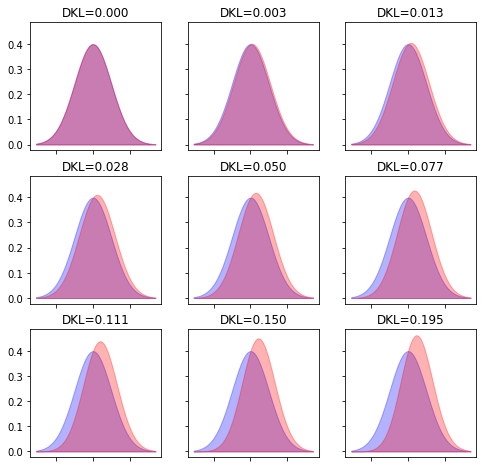

In [16]:
import numpy as np
from scipy.stats import norm, skewnorm, entropy
import matplotlib.pyplot as plt

ndiv = 100
px =  np.linspace(norm.ppf(0.001), (norm.ppf(0.999) * 1.1), ndiv)

pdf_std = norm.pdf(px, loc=0., scale=1.)    # reference distribution
py_zero = np.zeros_like(px)                 # y=0.0 line

# Skewed normal distributions
fig, axes = plt.subplots(3, 3, figsize=(8, 8), sharey=True)
skew_opts = np.array([i * 0.1 for i in range(9)])
skew_opts = skew_opts.reshape([3, 3])

for i in range(3):
    for j in range(3):
        ax_ij = axes[i, j]
        ax_ij.fill_between(px, pdf_std, py_zero, color='b', alpha=0.3)

        pdf_ij = skewnorm.pdf(px, skew_opts[i, j], scale=1.)

        ax_ij.fill_between(px, pdf_ij, py_zero, color='r', alpha=0.3)
        ax_ij.set_xticklabels([])

        dkl_ij = entropy(pdf_std, pdf_ij)
        title_str = 'DKL={:>.3f}'.format(dkl_ij)
        ax_ij.set_title(title_str)

        # calculate area out-of-union
        s = sum([abs(y1 - y2) for y1, y2 in zip(pdf_std, pdf_ij)])
        print(' s = {:>.4f}, DKL = {:>.4f}'.format(s, dkl_ij))

plt.show()

## 2-9. 密度比推定による異常検知

この手法が強力な点はノイズに左右されづらく、応用範囲が広い点です。<br>
概念としては直接値を推定せずに密度比を推定するので理解しづらい点がありますが、理解できると強力。

**利用シーン**<br>
- 正常なデータをもとに異常なデータを含むであろうデータの中から異常データを検出する時<br>
- 個々のデータを見ずにデータ全体を見るため、個々のデータのノイズが載らずに精度が高くなる可能性あり。<br>

**手法**<br>
1. カルバック・ライブラー密度比推定法 KLIEP (Sugiyama+ 2008)<br>
　Kullback-Liebler Importance Estimation Procedure
2. 最小2乗密度比推定法 LSIF (Kanamori+ 2009)
3. LOF(Local Outlier Factor)

### 2-9-1. カルバック・ライブラー密度比推定法 KLIEP 

1-1. 線形モデルの仮定
密度比を表す基本モデルとして線形モデルを仮定
1-2. 線形モデルに使用するパラメータは密度比ともとの確率分布の情報理論的距離
（カルバック・ライブラーダイバージェンス）が近くなるように推定

LSIF を進化させたものが uLSIF という手法。
[1]で LSIF として紹介されているものが、uLSIF のこと。

### 2-9-2. 最小2乗密度比推定法 LSIF (Kanamori+ 2009)

### 2-9-3. LOF(Local Outlier Factor)

## 2-10. 密度比推定による変化検知

**利用シーン**<br>
**カルバック・ライブラーダイバージェンスではノイズの影響を受けやすい。**<br>
特に構造学習においては個々の値のノイズが全体に影響してしまう。<br>
→センサデータなどのノイズが不可避なデータに対して、分布変化検知問題を解くには別の尺度が必要。

**手法**<br>
1. ピアソン・ダイバージェンス<br>
対数関数を含まないため、カルバック・ライブラーダイバージェンスよりも異常値にロバスト（変化に強い）

2. 相対ピアソン・ダイバージェンス<br>
異常値に関する感度とロバスト性をコントロールする関数があるため、用途によって調整可能。

構造変化検知でも、一つ一つの値を導出するとノイズがのり、精緻な推定が難しいため、<br>
正確なデータの精度行列と異常値を含むデータの精度行列の差を取って、<br>
カルバック・ライブラーダイバージェンスを用いて、密度比を直接推定します。

## 参考文献

[1]異常検知と変化検知 (機械学習プロフェッショナルシリーズ)<br>
https://www.amazon.co.jp/dp/4061529080

[2]確率分布間の距離推定 ：機械学習分野における最新動向<br>
https://www.jstage.jst.go.jp/article/jsiamt/23/3/23_KJ00008829126/_pdf

[3]Robust covariance estimation and Mahalanobis distances relevance<br>
http://scikit-learn.org/stable/auto_examples/covariance/plot_mahalanobis_distances.html

[4]Minimum Covariance Determinant (MCD): robust estimator of covariance<br>
http://scikit-learn.org/stable/modules/generated/sklearn.covariance.MinCovDet.html#sklearn.covariance.MinCovDet

[5]カルバック・ライブラー情報量<br>
https://goo.gl/9klgmb

[6]scipy.stats.entropy<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html<br>
→Kullback–Leibler divergence（DKL) の計算

[7]教師なし学習による異常値検知: マハラノビス距離 (実装編)<br>
https://qiita.com/shopetan/items/30f6e0932485c976a946

[8] MT法(マハラノビス・タグチ法)<br>
http://heartland.geocities.jp/ecodata222/ed/edj1-2-2-4.html

[9]入門 機械学習による異常検知―Rによる実践ガイド をPythonで実装<br>
https://github.com/gibachan/anomaly-detection

[10]生成モデルで語られる Kullback-Leibler を理解する<br>
https://qiita.com/TomokIshii/items/b9a11c19bd5c36ad0287

[11]異常検知と変化検知のまとめ　数式なし<br>
https://qiita.com/GushiSnow/items/f032806cfa8cec046318

[12]異常検知と変化検知 第4章 近傍法による異常検知<br>
https://www.slideshare.net/matsukenbook/4-53640134

[13]異常検知本の読書メモ Part 1<br>
http://www.yasuhisay.info/entry/2016/12/04/175000

http://abrahamcow.hatenablog.com/entry/2017/12/28/180533

https://www.slideshare.net/ssuser9d1eb2/13-77738468/9